<img src="../azul_horizontal_logo_upn.png" width="30%" />

In [1]:
""" 

:Author: Jahir Lopez / Oscar Mendez
:Corporate: Universidad Pedagogica Nacional
:Date: 2019/06/01
:Maestria en tecnologias de la informacion aplicadas a la educación

"""

' \n\n:Author: Jahir Lopez / Oscar Mendez\n:Corporate: Universidad Pedagogica Nacional\n:Date: 2019/06/01\n:Maestria en tecnologias de la informacion aplicadas a la educación\n\n'

# Importamos librerias

In [375]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

from sklearn.externals import joblib

%matplotlib inline

# Cargamos el dataset procesado

In [376]:
path = "/Users/oscarmendezaguirre/PycharmProjects/upn_tesis_m/"
filename = "data/NEW_SIMULATE_alban_data_procesada_2.csv"
fullpath = os.path.join(path, filename)
data_artificial = pd.read_csv(fullpath)

In [377]:
from IPython.display import display, HTML
display(HTML(data_artificial[4:10].to_html()))

In [378]:
data_artificial['GRADO'] = data_artificial['GRADO'].replace('10020', 'decimo')
data_artificial['GRADO'] = data_artificial['GRADO'].replace('10010', 'decimo')
data_artificial['GRADO'] = data_artificial['GRADO'].replace('1101', 'once')
data_artificial['GRADO'] = data_artificial['GRADO'].replace('9010', 'noveno')
data_artificial['GRADO'] = data_artificial['GRADO'].replace('9020', 'noveno')

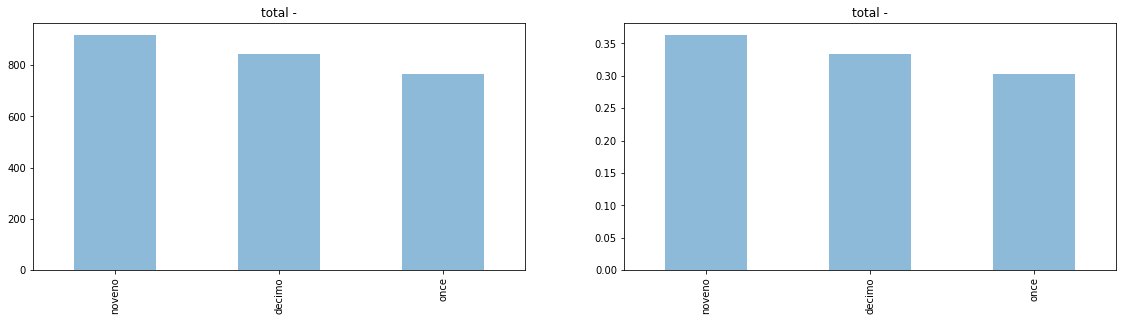

In [379]:
fig = plt.figure(figsize=(30,10)) 
plt.subplot2grid((2,3),(0,0))
data_artificial.GRADO.value_counts().plot(kind='bar', alpha=0.5)
plt.title('total -')
plt.subplot2grid((2,3),(0,1))
data_artificial.GRADO.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('total -')
plt.show()

In [380]:
data_artificial.drop(
    [
        'MCPIO_RESIDE',
        'RESULTADO_4',
        'RESULTADO_2',
        'RESULTADO_3',
        
    ], 
    axis='columns', 
    inplace=True
)

## Verificamos que no existan datos nulos o faltantes

In [381]:
data_artificial.isnull().any().any()

False

In [382]:
from IPython.display import display, HTML
display(HTML(data_artificial.notnull().apply(pd.Series.value_counts).to_html()))

## Visualizacion del estado de la variable dependiente

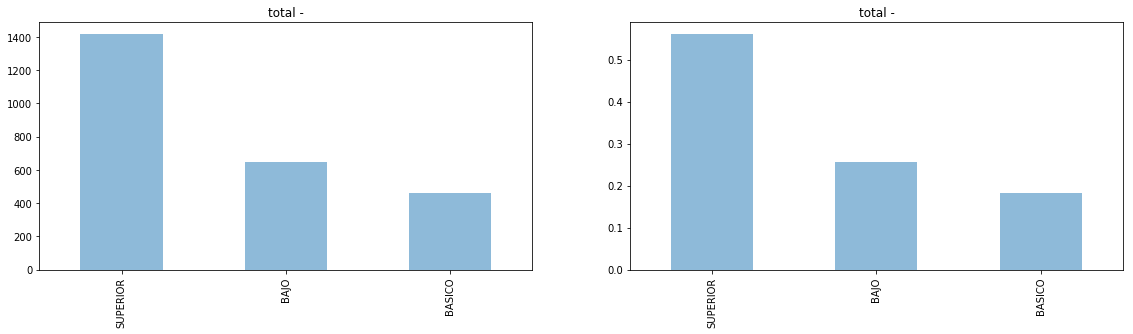

In [383]:
fig = plt.figure(figsize=(30,10)) 
plt.subplot2grid((2,3),(0,0))
data_artificial.RESULTADO_1.value_counts().plot(kind='bar', alpha=0.5)
plt.title('total -')
plt.subplot2grid((2,3),(0,1))
data_artificial.RESULTADO_1.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('total -')
plt.show()

## creamos nuevas categorias para balancear la variable dependiente

In [384]:
for index in data_artificial.index:
    if data_artificial.loc[index, 'RESULTADO_1'] == 'SUPERIOR' or data_artificial.loc[index, 'RESULTADO_1'] == 'ALTO':
        data_artificial.loc[index,'RESULTADO'] = 'NO_RIESGO'
    elif data_artificial.loc[index, 'RESULTADO_1'] == 'BASICO' or data_artificial.loc[index, 'RESULTADO_1'] == 'BAJO':
        data_artificial.loc[index,'RESULTADO'] = 'RIESGO'

## Graficamos las nuevas categorias

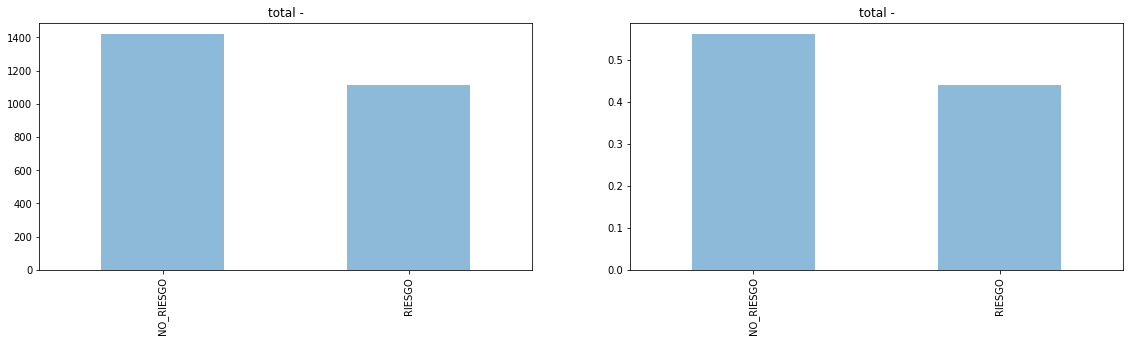

In [385]:
fig = plt.figure(figsize=(30,10)) 
plt.subplot2grid((2,3),(0,0))
data_artificial.RESULTADO.value_counts().plot(kind='bar', alpha=0.5)
plt.title('total -')
plt.subplot2grid((2,3),(0,1))
data_artificial.RESULTADO.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('total -')
plt.show()

In [386]:
from IPython.display import display, HTML
display(HTML(data_artificial[4:10].to_html()))

In [387]:
data_artificial.drop(
    [
        'MUNICIP_NACE',
        'NOMBRE_URBANO',
        'MATERIAL_PISOS',
        
    ], 
    axis='columns', 
    inplace=True
)

## factorizamos los valores del dataset para trabajar con el algoritmo de clasificacion

In [388]:
for feature in data_artificial.dtypes[data_artificial.dtypes == 'category'].index:
    sns.countplot(y=feature, data=data_artificial, order = data_artificial[feature].value_counts().index)
    plt.show()

In [389]:
tipos = data_artificial.columns.to_series().groupby(data_artificial.dtypes).groups
categoricos = tipos[np.dtype('object')]

for categorico in categoricos:
    data_artificial[categorico], _ = pd.factorize(data_artificial[categorico])

In [390]:
from IPython.display import display, HTML
display(HTML(data_artificial[4:10].to_html()))

# Separamos del dataset la variable dependiente

In [391]:
y = data_artificial['RESULTADO']

# Separamos del dataset las variables independientes

In [392]:
X = data_artificial.drop(['RESULTADO_1', 'RESULTADO'], axis='columns')

In [393]:
X.shape

(2529, 63)

In [394]:
from IPython.display import display, HTML
display(HTML(X[4:10].to_html()))

# Random Forest selection features
* preparar el data set
* entrenar el clasificador random forest
* identificar los features mas importantes
* crear el nuevo dataset con los features seleccionados
* compar la exactitud de la seleccion

In [395]:
feat_labels = X.columns.values

In [396]:
# seleccionamos el 20% de la muestra para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [397]:
X_train.shape

(2023, 63)

In [398]:
# creamos el clasificador
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# entrenamos el clasificador
model = clf.fit(X_train, y_train)

# imprimimos el listado de importancia para la seleccion
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('GENERO', 0.006256557646351908)
('GRADO', 0.0114172602926421)
('SABER_3', 0.006469956407390536)
('SABER_5', 0.0061892585112179495)
('SABER_9', 0.006224958620320255)
('SIMULACROS', 0.006002734101722981)
('AREA_RESIDENCIA', 0.006599438841722579)
('NOMBRE_RURAL', 0.021830721123746673)
('NIVEL_EDUCATIVO_PADRE', 0.01869106108718978)
('NIVEL_EDUCATIVO_MADRE', 0.020331339002792947)
('ESTRATO', 0.008915355995871267)
('SISBEN', 0.04341689713552469)
('PERSONA_CONFORMA_HOGAR', 0.04320710373665332)
('NRO_HERMANAS', 0.0404097155649092)
('NRO_HERMANOS', 0.04234716298764329)
('HABITACION_DUERME_HOGAR', 0.04150275255137095)
('HOGAR_INTERNET', 0.006275441882429163)
('HOGAR_SERVICIO_TV', 0.006316429597391717)
('H_PC', 0.007358669231614739)
('H_LAVADORA', 0.006134115626687032)
('H_HORNO_MICROO', 0.00643214755510643)
('H_HORNO_ELECT', 0.00041472972106033505)
('H_HORNO_GAS', 0.006533327562870124)
('H_DVD', 0.006495726742436373)
('HOGAR_NEVERA', 0.00488161389333259)
('H_HOGAR_CELULAR', 0.006603693476500127

In [399]:
importances = model.feature_importances_
# feature_importance = list(importances)

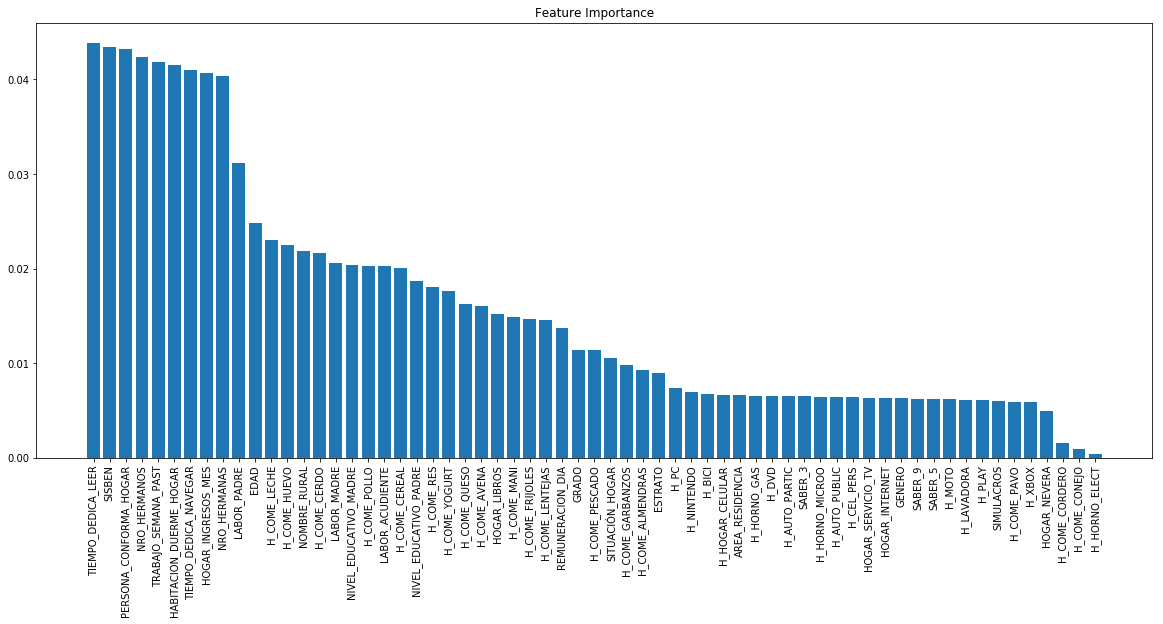

In [400]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(20,8))

# # Create plot title
plt.title("Feature Importance")
# # Add bars
plt.bar(range(X.shape[1]), importances[indices])

# # Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# # Show plot
plt.show()

In [401]:
# creamos un selector que use los features que tengan una importancia superior a 0.01, la suma totas es del 100%
sfm = SelectFromModel(clf, threshold=0.008)
# Entrenamos el selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.008)

In [402]:
importances = list(model.feature_importances_)
feature_list = list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# [print('Variable: {:20} Importancia: {}'.format(*pair)) for pair in feature_importances];

# calculamos la importancia acomulada de las variables

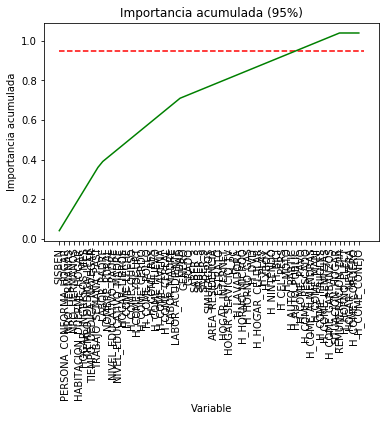

In [403]:
x_values = list(range(len(importances)))
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.cumsum(sorted_importances)

plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Importancia acumulada'); plt.title('Importancia acumulada (95%)');

In [404]:
len(sfm.get_support(indices=True))

36

# Creación de dataframes resultantes con los atributos mas importantes

In [405]:
# transformamos los datos para crear un nuevo dataset con las caracteristicas mas importantes, se hace para X, y
labels_important = [ feat_labels[feature_list_index] for feature_list_index in sfm.get_support(indices=True)]

aux_X_train = X_train
aux_X_test = X_test
    
for feature_list_index in X_train:
    if feature_list_index not in labels_important:
        aux_X_train.drop(feature_list_index, axis='columns',inplace=True)        

for feature_list_index in X_test:
    if feature_list_index not in labels_important:
        aux_X_test.drop(feature_list_index, axis='columns',inplace=True)         

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# GRADIEN BOOSTING TREEE

In [406]:
def learn(x, y, test_x):
    # set sample weight
    weight_list = []
    for j in range(len(y)):
        if y[j] == "0":
            weight_list.append(variables.weight_0_gdbt_b)
        if y[j] == "1000":
            weight_list.append(variables.weight_1000_gdbt_b)
        if y[j] == "1500":
            weight_list.append(variables.weight_1500_gdbt_b)
        if y[j] == "2000":
            weight_list.append(variables.weight_2000_gdbt_b)

    clf = GradientBoostingClassifier(loss='deviance', n_estimators=variables.n_estimators_gdbt_b,
                                     learning_rate=variables.learning_rate_gdbt_b,
                                     max_depth=variables.max_depth_gdbt_b, random_state=0,
                                     min_samples_split=variables.min_samples_split_gdbt_b,
                                     min_samples_leaf=variables.min_samples_leaf_gdbt_b,
                                     subsample=variables.subsample_gdbt_b,
                                     ).fit(x, y, weight_list)
    prediction_list = clf.predict(test_x)

    return prediction_list 

In [407]:
# scaler = MinMaxScaler()
# X_train_scale = scaler.fit_transform(aux_X_train)
# X_test_scale = scaler.transform(aux_X_test)

## Creacion del dataframe de entrenamiento y de test

In [408]:
# X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)

In [409]:
# y_validation_sub.shape

## Mejores parametros para el clasificador

In [410]:
# ?GradientBoostingClassifier

In [411]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=6, 
        learning_rate = learning_rate, 
        max_features=22, max_depth = 4, 
        random_state = 0,
        min_weight_fraction_leaf=0.2
    )
    gb.fit(aux_X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(aux_X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(aux_X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.564
Accuracy score (validation): 0.547

Learning rate:  0.1
Accuracy score (training): 0.564
Accuracy score (validation): 0.547

Learning rate:  0.25
Accuracy score (training): 0.568
Accuracy score (validation): 0.543

Learning rate:  0.5
Accuracy score (training): 0.600
Accuracy score (validation): 0.545

Learning rate:  0.75
Accuracy score (training): 0.604
Accuracy score (validation): 0.514

Learning rate:  1
Accuracy score (training): 0.598
Accuracy score (validation): 0.534



# Entrenamos el clasificador

In [412]:
gb = GradientBoostingClassifier(
    n_estimators=10, 
    learning_rate = 0.5,
    max_features=22, 
    max_depth = 3, 
    random_state = 1,
    min_weight_fraction_leaf=0.08
)
gb.fit(aux_X_test, y_test)
predictions = gb.predict(aux_X_test)

### Matriz de confusion

In [413]:
def plot_confusion_matrix(cm,
                         target_names,
                         title='Confusion matrix',
                         cmap=None,
                         normalize=True):
   import matplotlib.pyplot as plt
   import numpy as np
   import itertools

   accuracy = np.trace(cm) / float(np.sum(cm))
   misclass = 1 - accuracy

   if cmap is None:
       cmap = plt.get_cmap('Blues')

   plt.figure(figsize=(8, 6))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()

   if target_names is not None:
       tick_marks = np.arange(len(target_names))
       plt.xticks(tick_marks, target_names, rotation=45)
       plt.yticks(tick_marks, target_names)

   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


   thresh = cm.max() / 1.5 if normalize else cm.max() / 2
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       if normalize:
           plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
       else:
           plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label\naccuracy={:0.4f}; '.format(accuracy))
   plt.show()

Confusion Matrix:


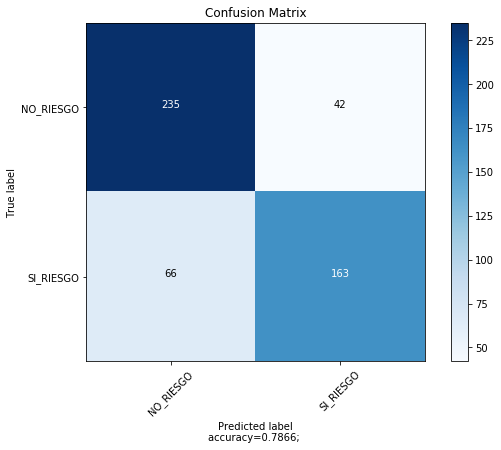

In [414]:
print("Confusion Matrix:")
plot_confusion_matrix(cm = np.array(confusion_matrix(y_test, predictions)),
                     normalize    = False,
                     target_names = ['NO_RIESGO', 'SI_RIESGO'],
                     title        = "Confusion Matrix")

### Reporte del clasificador

In [353]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       277
           1       0.80      0.71      0.75       229

   micro avg       0.79      0.79      0.79       506
   macro avg       0.79      0.78      0.78       506
weighted avg       0.79      0.79      0.79       506



### Calculo del area bajo la curva 

In [354]:
y_scores_gb = gb.decision_function(aux_X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.3f}".format(roc_auc_gb))

Area under ROC curve = 0.866


# Curva de aprendizaje

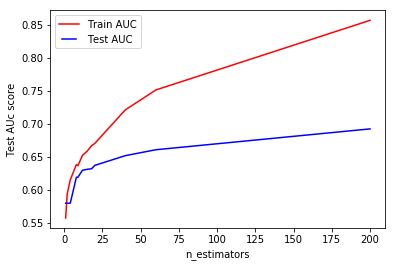

In [355]:
n_estimators = [1, 2, 4,  8, 9, 12, 15, 18, 20, 40, 60, 200]
train_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(
        n_estimators=estimator,
            learning_rate = 0.1,
            max_features=22, 
            max_depth = 3, 
            random_state = 1,
            min_weight_fraction_leaf=0.08
    )
   model.fit(aux_X_train, y_train)
    
    
   y_pred = model.decision_function(aux_X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line2, = plt.plot(n_estimators, train_results, "r", label="Train AUC")
plt.ylabel("Train AUc score")
plt.xlabel("n_estimators")

test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(
        n_estimators=estimator, 
            learning_rate = 0.1,
            max_features=22, 
            max_depth = 2, 
            random_state = 1,
            min_weight_fraction_leaf=0.4
    )

   model.fit(aux_X_test, y_test)
    
   test_pred = model.decision_function(aux_X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, test_results, "b", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Test AUc score")
plt.xlabel("n_estimators")
plt.show()

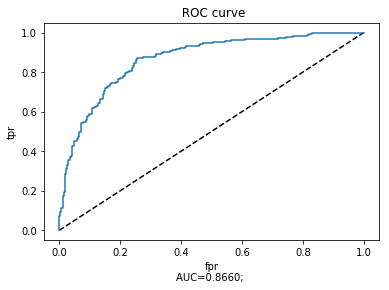

In [421]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_gb, tpr_gb, label='Knn')
plt.ylabel('tpr')
plt.xlabel('fpr\nAUC={:0.4f}; '.format(roc_auc_gb))
plt.title(' ROC curve')
plt.show()

### Ejemplo de una clasificacion

In [357]:
predictions = gb.predict(aux_X_test[:2])
predictions[0]

0

In [358]:
aux_X_test[3:5]

GRADO  NOMBRE_RURAL  NIVEL_EDUCATIVO_PADRE  NIVEL_EDUCATIVO_MADRE  \
330      0             2                      4                      1   
795      2             1                      2                      0   

     ESTRATO  SISBEN  PERSONA_CONFORMA_HOGAR  NRO_HERMANAS  NRO_HERMANOS  \
330        0   33.91                    4.85          1.92          0.46   
795        0   28.66                    6.98          1.30          0.85   

     HABITACION_DUERME_HOGAR  ...  H_COME_GARBANZOS  LABOR_PADRE  LABOR_MADRE  \
330                     4.82  ...                 0           21            2   
795                     3.77  ...                 0           47           26   

     LABOR_ACUDIENTE  SITUACIÓN_HOGAR  TIEMPO_DEDICA_LEER  \
330                3                1                3.48   
795                6                0                1.30   

     TIEMPO_DEDICA_NAVEGAR  TRABAJO_SEMANA_PAST  EDAD  REMUNERACION_DIA  
330                   1.97                 0.39    16                 2  
795                   2.95                 1.87    13                 3  

[2 rows x 36 columns]

### Probabilidad de la prediccion del ejemplo

In [359]:
gb.predict_proba(aux_X_test[3:5])

array([[0.75285901, 0.24714099],
       [0.29654662, 0.70345338]])

In [360]:
gb.predict(aux_X_test[3:5])

array([0, 1])

# Se exporta el modelo resultante

In [361]:
filename = 'pp1_model.sav'
joblib.dump(gb, filename)

['pp1_model.sav']

## Ejemplo de uso

In [362]:
loaded_model = joblib.load(filename)
result = loaded_model.predict_proba(aux_X_test[3:5])
print(result)

[[0.75285901 0.24714099]
 [0.29654662 0.70345338]]


In [367]:
aux_X_test.columns.values

array(['GRADO', 'NOMBRE_RURAL', 'NIVEL_EDUCATIVO_PADRE',
       'NIVEL_EDUCATIVO_MADRE', 'ESTRATO', 'SISBEN',
       'PERSONA_CONFORMA_HOGAR', 'NRO_HERMANAS', 'NRO_HERMANOS',
       'HABITACION_DUERME_HOGAR', 'HOGAR_LIBROS', 'HOGAR_INGRESOS_MES',
       'H_COME_LECHE', 'H_COME_QUESO', 'H_COME_YOGURT', 'H_COME_CERDO',
       'H_COME_POLLO', 'H_COME_RES', 'H_COME_PESCADO', 'H_COME_HUEVO',
       'H_COME_AVENA', 'H_COME_CEREAL', 'H_COME_ALMENDRAS', 'H_COME_MANI',
       'H_COME_FRIJOLES', 'H_COME_LENTEJAS', 'H_COME_GARBANZOS',
       'LABOR_PADRE', 'LABOR_MADRE', 'LABOR_ACUDIENTE', 'SITUACIÓN_HOGAR',
       'TIEMPO_DEDICA_LEER', 'TIEMPO_DEDICA_NAVEGAR',
       'TRABAJO_SEMANA_PAST', 'EDAD', 'REMUNERACION_DIA'], dtype=object)

In [368]:
aux_X_test.shape

(506, 36)

In [369]:
len(aux_X_test)

506